In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from bartpy.bartpy.sklearnmodel import SklearnModel

initialize SklearnTreeInitializer...
exit SklearnTreeInitializer...


Text(0.5, 1.0, 'X v y')

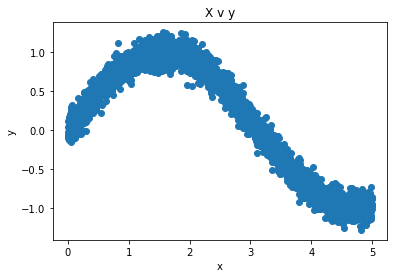

In [2]:
x = np.linspace(0, 5, 3000)
X = pd.DataFrame(x).sample(frac=1.0).values
y = np.random.normal(0, 0.1, size=3000) + np.sin(X[:, 0])
plt.scatter(X[:, 0], y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("X v y")

In [3]:
model = SklearnModel(
    n_samples=10,#1000, 
    n_burn=5,#200, 
    n_trees=1,#00, 
    n_chains=1,#4,
    n_jobs=1,#-1,
    store_in_sample_predictions=False
)

initializing SklearnModel...
initializing LeafNodeSampler...
exit init LeafNodeSampler...
init of SampleSchedule...
exit init of SampleSchedule
initializing ModelSampler...
exit init ModelSampler


In [4]:
model.fit(X, y)

100%|██████████| 10/10 [00:00<00:00, 266.78it/s]

enter SklearnModel.fit...
run SklearnModel._construct_model(X, y)
enter SklearnModel._construct_model...
enter SklearnModel._convert_covariates_to_data...
return SklearnModel._convert_covariates_to_data...
initializing Sigma...
exit init Sigma...
initializing Model...
in if trees is None
in Model.initialize_trees
initialize TreeNode
exit init TreeNode
initializing Tree...
exit init Tree
in Tree.update_y
enter TreeNode.update_y
exit TreeNode.update_y
return Tree.update_y
in Tree.update_y
enter TreeNode.update_y
exit TreeNode.update_y
return Tree.update_y
return Model.initialize_trees
exit init Model...
return SklearnModel._construct_model...
done with SklearnModel._construct_model(X, y)
run in Parallel SklearnModel.f_delayed_chains(X, y)
enter sklearnmodel.py run_chain...
enter SklearnModel._construct_model...
enter SklearnModel._convert_covariates_to_data...
return SklearnModel._convert_covariates_to_data...
initializing Sigma...
exit init Sigma...
initializing Model...
in if trees is 

SklearnModel(n_burn=5, n_chains=1, n_jobs=1, n_samples=10, n_trees=1)

In [10]:
pred = model.predict(X)
score = model.score(X, y)

In [5]:
359*.8

287.2

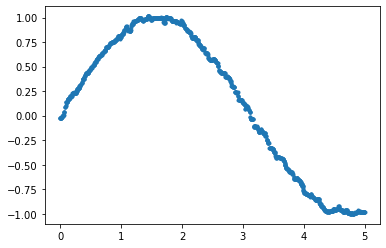

In [24]:
len(predictions[0][0])
plt.plot(X[test_splits[0]], predictions[0][0], '.')

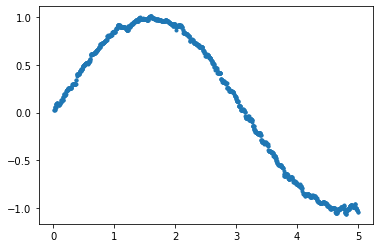

In [27]:
len(predictions[0][0])
plt.plot(X[test_splits[1]], predictions[1][0], '.')

In [15]:
models

[[SklearnModel(n_samples=1000,
               tree_sampler=<bartpy.bartpy.samplers.unconstrainedtree.treemutation.UnconstrainedTreeMutationSampler object at 0x7fe401dc7040>),
  LinearRegression()],
 [SklearnModel(n_samples=1000,
               tree_sampler=<bartpy.bartpy.samplers.unconstrainedtree.treemutation.UnconstrainedTreeMutationSampler object at 0x7fe3d0e6ad00>),
  LinearRegression()]]

In [20]:
X[test_splits[0]]

array([[2.51917306],
       [2.79426475],
       [1.21207069],
       ...,
       [1.55885295],
       [2.5225075 ],
       [4.64488163]])

In [26]:
len(predictions)#[0][1])

2